In [ ]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Para adquirir esses arquivos, siga os passos desse site: https://support.stats.fm/docs/import/spotify-import/

In [ ]:
data1 = pd.read_json("Streaming_History_Audio_2016-2017_0.json")
data2 = pd.read_json("Streaming_History_Audio_2017-2018_1.json")
data3 = pd.read_json("Streaming_History_Audio_2018-2019_2.json")
data4 = pd.read_json("Streaming_History_Audio_2019-2021_3.json")
data5 = pd.read_json("Streaming_History_Audio_2021_4.json")
data6 = pd.read_json("Streaming_History_Audio_2021-2023_5.json")
data7 = pd.read_json("Streaming_History_Audio_2023-2024_6.json")
data8 = pd.read_json("Streaming_History_Audio_2024-2025_7.json")

In [ ]:
pdList = [data1, data2, data3, data4, data5, data6, data7, data8]  # List of your dataframes
data = pd.concat(pdList)

In [ ]:
data.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode'],
      dtype='object')

In [ ]:
data.tail()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
15163,2025-01-31T17:08:48Z,ios,469,BR,2804:14d:5cd0:9081:4cf9:63b4:e93c:cac1,Razão da Minha Vida - Ao Vivo,Belo,Pra Ver o Sol Brilhar (Ao Vivo),spotify:track:6pUjgtGGQY1jt1P7qWbqjp,NaN,...,NaN,NaN,NaN,backbtn,backbtn,True,True,False,1.738343e+09,False
15164,2025-01-31T17:11:50Z,ios,183894,BR,2804:14d:5cd0:9081:4cf9:63b4:e93c:cac1,acabou o amor,MC Cabelinho,Não Sou Santo Mas Não Sou Bandido,spotify:track:3TuJODOhChHkg1pbMQ8RW4,NaN,...,NaN,NaN,NaN,backbtn,trackdone,True,False,False,1.738343e+09,False
15165,2025-01-31T17:15:53Z,ios,242480,BR,2804:14d:5cd0:9081:4cf9:63b4:e93c:cac1,Razão da Minha Vida - Ao Vivo,Belo,Pra Ver o Sol Brilhar (Ao Vivo),spotify:track:6pUjgtGGQY1jt1P7qWbqjp,NaN,...,NaN,NaN,NaN,trackdone,trackdone,True,False,False,1.738344e+09,False
15166,2025-01-31T17:19:43Z,ios,229120,BR,2804:14d:5cd0:9081:4cf9:63b4:e93c:cac1,My Blood,Twenty One Pilots,Trench,spotify:track:5HeKOKc4phmLn8e4I7EkzD,NaN,...,NaN,NaN,NaN,trackdone,trackdone,True,False,False,1.738344e+09,False
15167,2025-01-31T17:22:17Z,ios,153190,BR,2804:14d:5cd0:9081:4cf9:63b4:e93c:cac1,Ghost,Justin Bieber,Justice,spotify:track:6I3mqTwhRpn34SLVafSH7G,NaN,...,NaN,NaN,NaN,trackdone,trackdone,True,False,False,1.738344e+09,False


In [ ]:
data["min_played"] = data["ms_played"] / 60000

print(data)

                         ts                           platform  ms_played  \
0      2016-05-27T03:12:23Z  Windows 7 (6.1.7601; x64; SP1; S)      35000   
1      2016-05-27T03:15:29Z  Windows 7 (6.1.7601; x64; SP1; S)     186330   
2      2016-05-27T03:15:47Z  Windows 7 (6.1.7601; x64; SP1; S)      17620   
3      2016-05-27T03:16:47Z  Windows 7 (6.1.7601; x64; SP1; S)      59870   
4      2016-05-27T03:17:03Z  Windows 7 (6.1.7601; x64; SP1; S)       5118   
...                     ...                                ...        ...   
15163  2025-01-31T17:08:48Z                                ios        469   
15164  2025-01-31T17:11:50Z                                ios     183894   
15165  2025-01-31T17:15:53Z                                ios     242480   
15166  2025-01-31T17:19:43Z                                ios     229120   
15167  2025-01-31T17:22:17Z                                ios     153190   

      conn_country                                 ip_addr  \
0            

In [ ]:
total_ms = data['ms_played'].sum()
total_ms = int(total_ms)
total_horas = str(datetime.timedelta(milliseconds=total_ms)).split(".")[0]
print('total de dias e horas escutadas:', total_horas)

total de dias e horas escutadas: 234 days, 16:57:30


In [ ]:
total_ms = data['ms_played'].sum()
total_min = total_ms / 60000  # Convertendo milissegundos para minutos

print(f'Tempo total escutado: {total_min:.2f} minutos')


Tempo total escutado: 337977.50 minutos


In [ ]:
total_musicas = len(data)
print('total de músicas escutadas', total_musicas)

total de músicas escutadas 124113


In [ ]:
data["ts"] = pd.to_datetime(data["ts"])
data["dias"] = data["ts"].dt.strftime('%Y-%m-%d')

In [ ]:
#comparando músicas por ano

data["ts"] = pd.to_datetime(data["ts"])
data["ano"] = data["ts"].dt.year
contagem_anos = data["ano"].value_counts()

ano_mais_frequente = contagem_anos.idxmax()
qtd_mais_frequente = contagem_anos.max()

print(f"O ano com mais streams é {ano_mais_frequente}, com {qtd_mais_frequente} linhas.")

O ano com mais streams é 2024, com 18339 linhas.


In [ ]:
data["ts"] = pd.to_datetime(data["ts"])

# Criando uma coluna com Mês e Ano
data["mes_ano"] = data["ts"].dt.to_period("M")

contagem_mesano = data['mes_ano'].value_counts()
mesano_mais_frequente = contagem_mesano.idxmax()
qtd_mesano_mais_frequente = contagem_mesano.max()
print(f"A mesano com mais streams é {mesano_mais_frequente}, com {qtd_mesano_mais_frequente} linhas.")
contagem_mesano

A mesano com mais streams é 2017-08, com 3392 linhas.


<ipython-input-14-ae5b7ac925a5>:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["mes_ano"] = data["ts"].dt.to_period("M")


,count
mes_ano,
2017-08,3392
2017-09,2975
2017-07,2432
2024-05,2216
2017-10,2208
...,...
2016-09,191
2016-07,166
2016-06,150


<ipython-input-15-7c4e0ba24b4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_anos.index, y=contagem_anos.values, palette="Blues")


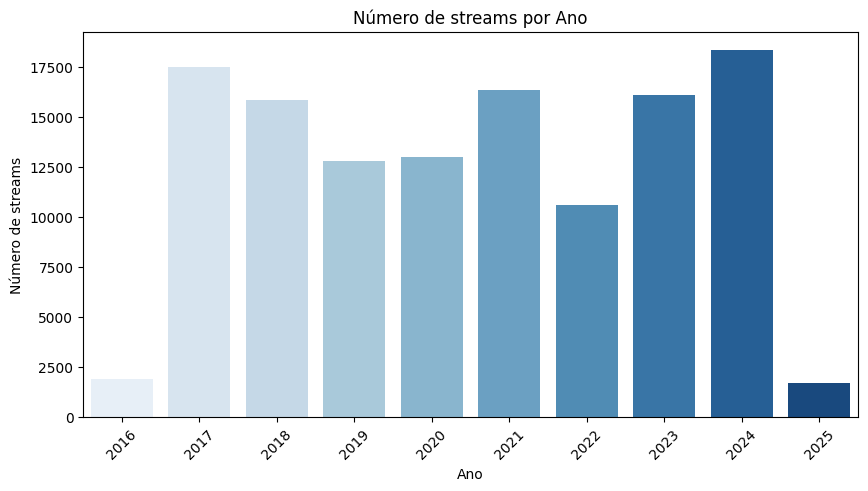

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=contagem_anos.index, y=contagem_anos.values, palette="Blues")

plt.xlabel("Ano")
plt.ylabel("Número de streams")
plt.title("Número de streams por Ano")
plt.xticks(rotation=45)

plt.show()

In [ ]:
minutos_porano = data.groupby("ano")["min_played"].agg(sum)
minutos_porano

<ipython-input-16-a843f761990a>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  minutos_porano = data.groupby("ano")["min_played"].agg(sum)


,min_played
ano,
2016,4152.423167
2017,35568.023433
2018,37376.972833
2019,34121.126783
2020,36494.799167
2021,43512.340117
2022,30438.932850
2023,51853.812033
2024,58979.199633


In [ ]:
minutos_mesano = data['mes_ano'].value_counts()
mesano_mais_frequente = minutos_mesano.idxmax()
qtd_mesano_mais_frequente = minutos_mesano.max()
print(f"A mesano com mais streams é {mesano_mais_frequente}, com {qtd_mesano_mais_frequente} linhas.")
minutos_mesano

A mesano com mais streams é 2017-08, com 3392 linhas.


,count
mes_ano,
2017-08,3392
2017-09,2975
2017-07,2432
2024-05,2216
2017-10,2208
...,...
2016-09,191
2016-07,166
2016-06,150


In [ ]:
minutos_mesano = data.groupby("mes_ano")["min_played"].agg(sum)
mesano_mais_frequente = minutos_mesano.idxmax()
qtd_minmesano_mais_frequente = minutos_mesano.max()
print(f"A mesano com mais minutos ouvidos é {mesano_mais_frequente}, com {qtd_minmesano_mais_frequente} minutos.")


A mesano com mais minutos ouvidos é 2017-08, com 7896.3816 minutos.


<ipython-input-18-0487381af02d>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  minutos_mesano = data.groupby("mes_ano")["min_played"].agg(sum)


<ipython-input-19-ad00f694aca6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=minutos_porano.index, y=minutos_porano.values, palette="Blues", ax=ax1)
<ipython-input-19-ad00f694aca6>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(minutos_porano.index, rotation=45)


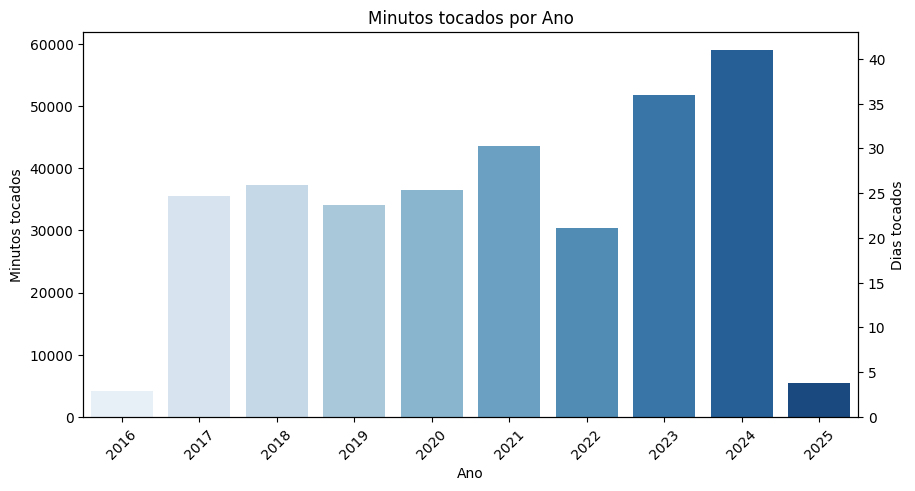

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a figura e o eixo principal
fig, ax1 = plt.subplots(figsize=(10, 5))

# Criar o gráfico de barras para minutos
sns.barplot(x=minutos_porano.index, y=minutos_porano.values, palette="Blues", ax=ax1)
ax1.set_xlabel("Ano")
ax1.set_ylabel("Minutos tocados")
ax1.set_title("Minutos tocados por Ano")
ax1.set_xticklabels(minutos_porano.index, rotation=45)

# Criar o segundo eixo Y para exibir em dias
ax2 = ax1.twinx()
dias_tocados = minutos_porano / 1440  # Convertendo minutos para dias
ax2.set_ylabel("Dias tocados")
ax2.set_ylim(ax1.get_ylim()[0] / 1440, ax1.get_ylim()[1] / 1440)  # Sincronizar escala

plt.show()


<ipython-input-37-df212483a1fe>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=minutos_porano.index, y=minutos_porano.values, palette="Greens", ax=ax1)
<ipython-input-37-df212483a1fe>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(minutos_porano.index, rotation=45, color='white')


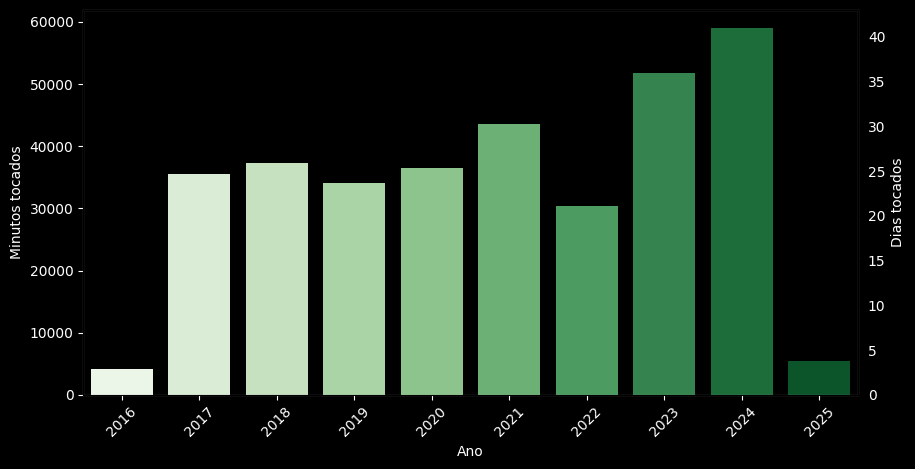

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a figura e o eixo principal com fundo preto
fig, ax1 = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('black')  # Fundo preto da figura
ax1.set_facecolor('black')  # Fundo preto do gráfico

# Criar o gráfico de barras para minutos
sns.barplot(x=minutos_porano.index, y=minutos_porano.values, palette="Greens", ax=ax1)

# Alterar cores dos textos e bordas
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')

ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.tick_params(colors='white')

ax1.set_xlabel("Ano")
ax1.set_ylabel("Minutos tocados")
ax1.set_xticklabels(minutos_porano.index, rotation=45, color='white')
ax1.yaxis.set_tick_params(labelcolor='white')

# Criar o segundo eixo Y para exibir em dias
ax2 = ax1.twinx()
dias_tocados = minutos_porano / 1440  # Convertendo minutos para dias
ax2.set_ylabel("Dias tocados", color='white')
ax2.set_ylim(ax1.get_ylim()[0] / 1440, ax1.get_ylim()[1] / 1440)  # Sincronizar escala
ax2.yaxis.set_tick_params(labelcolor='white')

plt.show()


In [ ]:
#plataforma usada
contagem_plataforma = data['platform'].value_counts()
plataforma_mais_frequente = contagem_plataforma.idxmax()
qtd_plt_mais_frequente = contagem_plataforma.max()
print(f"A plataforma com mais registros é {plataforma_mais_frequente}, com {qtd_plt_mais_frequente} linhas.")

A plataforma com mais registros é Android OS 8.1.0 API 27 (samsung, SM-J710MN), com 22019 linhas.


In [ ]:
#contagem artista (streams)
contagem_artista = data['master_metadata_album_artist_name'].value_counts()
artista_mais_frequente = contagem_artista.idxmax()
qtd_artista_mais_frequente = contagem_artista.max()
print(f"O artista com mais registros é {artista_mais_frequente}, com {qtd_artista_mais_frequente} linhas.")
print("Top 10 artistas:\n" ,contagem_artista.head(10))

O artista com mais registros é Twenty One Pilots, com 11500 linhas.
Top 10 artistas:
 master_metadata_album_artist_name
Twenty One Pilots    11500
blackbear             5706
Arctic Monkeys        4934
Imagine Dragons       4184
The Neighbourhood     4019
Post Malone           3114
Filipe Ret            2364
XXXTENTACION          1927
EDEN                  1886
Djonga                1758
Name: count, dtype: int64


In [ ]:
#contagem artista (min)
artista_mais_tocada_info = (
    data.groupby("master_metadata_album_artist_name")["min_played"]
    .sum()
    .reset_index()
    .sort_values(by="min_played", ascending=False)
)

print(artista_mais_tocada_info)


     master_metadata_album_artist_name    min_played
1751                 Twenty One Pilots  36001.031350
1875                         blackbear  14348.249867
102                     Arctic Monkeys  13967.685967
720                    Imagine Dragons  12140.491817
1682                 The Neighbourhood  11065.408067
...                                ...           ...
914                             Lensko      0.000000
1510                       Shawn James      0.000000
88                             Andinho      0.000000
50                          AWOLNATION      0.000000
1216                 Nadine Sutherland      0.000000

[1951 rows x 2 columns]


In [ ]:
#contagem musica (streams)
contagem_musica = data['master_metadata_track_name'].value_counts()
musica_mais_frequente = contagem_musica.idxmax()
qtd_musica_mais_frequente = contagem_musica.max()
print(f"O musica com mais registros é {musica_mais_frequente}, com {qtd_musica_mais_frequente} linhas.")
print("Top 10 musicas:\n" ,contagem_musica.head(10))

O musica com mais registros é Sweater Weather, com 491 linhas.
Top 10 musicas:
 master_metadata_track_name
Sweater Weather    491
Ride               366
idfc               332
Screen             300
Daddy Issues       298
Not Today          292
Cry Baby           292
Polarize           289
Stressed Out       285
The Judge          283
Name: count, dtype: int64


In [ ]:
musica_mais_tocada_info = (
    data.groupby("master_metadata_track_name")["min_played"]
    .sum()
    .reset_index()
    .sort_values(by="min_played", ascending=False)
)

print(musica_mais_tocada_info)


             master_metadata_track_name   min_played
3830         Poetas no Topo 3.2: Enredo  1522.619100
4742                    Sweater Weather  1467.715533
3829        Poetas no Topo 3.1: Prólogo  1309.797417
3827                   Poetas no Topo 2  1253.323967
3831          Poetas no Topo 3.3, Pt. 1  1121.309533
...                                 ...          ...
2615           King Bran's Final Voyage     0.000000
4070                         Recayd Mob     0.000000
4069                            Rebirth     0.000000
4044  Ralando O Tchan (Dança Do Ventre)     0.000000
1582                           Explosao     0.000000

[6094 rows x 2 columns]


In [ ]:
#contagem album (streams)
contagem_album = data['master_metadata_album_album_name'].value_counts()
album_mais_frequente = contagem_album.idxmax()
qtd_album_mais_frequente = contagem_album.max()
print(f"O album com mais registros é {album_mais_frequente}, com {qtd_album_mais_frequente} linhas.")
print("Top 10 albums:\n" ,contagem_album.head(10))

O album com mais registros é Blurryface, com 3232 linhas.
Top 10 albums:
 master_metadata_album_album_name
Blurryface                   3232
Vessel                       2375
Trench                       2018
Wiped Out!                   1435
AM                           1367
Favourite Worst Nightmare    1290
Origins                      1164
Twenty One Pilots            1156
ANONYMOUS                    1151
I Love You.                  1116
Name: count, dtype: int64


In [ ]:
album_mais_tocada_info = (
    data.groupby("master_metadata_album_album_name")["min_played"]
    .sum()
    .reset_index()
    .sort_values(by="min_played", ascending=False)

)

print(album_mais_tocada_info)


     master_metadata_album_album_name   min_played
472                        Blurryface  9514.543867
3381                           Vessel  7282.399317
3261                           Trench  6859.465700
3493                       Wiped Out!  4412.821267
146                                AM  3854.997333
...                               ...          ...
3712              É O Tchan Do Brasil     0.000000
1597               Just Ragga, Vol. 3     0.000000
498                   Brave New World     0.000000
3128                    The Open Door     0.000000
2304                         Parklive     0.000000

[3737 rows x 2 columns]


In [ ]:
#países ouvidos
contagem_pais = data['conn_country'].value_counts()
contagem_pais

,count
conn_country,
BR,121686
CA,911
IT,371
NL,303
BE,228
ZZ,225
CH,202
SE,81
DE,37


In [ ]:
#começo e fim
contagem_start = data['reason_start'].value_counts()
start_mais_frequente = contagem_start.idxmax()
qtd_start_mais_frequente = contagem_start.max()
contagem_fim = data['reason_end'].value_counts()
fim_mais_frequente = contagem_fim.idxmax()
qtd_fim_mais_frequente = contagem_fim.max()
print(f"O start com mais registros é {start_mais_frequente}, com {qtd_start_mais_frequente} linhas. O fim com mais registros é {fim_mais_frequente}, com {qtd_fim_mais_frequente} linhas.")
contagem_fim

O start com mais registros é trackdone, com 86636 linhas. O fim com mais registros é trackdone, com 86980 linhas.


,count
reason_end,
trackdone,86980
fwdbtn,15189
endplay,8776
logout,4232
backbtn,4038
unexpected-exit-while-paused,3059
remote,1174
unknown,367
unexpected-exit,253


In [ ]:
#artista que definiu cada ano
artista_mais_presente = data.groupby("ano")["master_metadata_album_artist_name"].agg(lambda x: x.value_counts().idxmax())

print(artista_mais_presente)

ano
2016            TheFatRat
2017    Twenty One Pilots
2018    Twenty One Pilots
2019    Twenty One Pilots
2020    Twenty One Pilots
2021    Twenty One Pilots
2022       Arctic Monkeys
2023           Filipe Ret
2024    Twenty One Pilots
2025    Twenty One Pilots
Name: master_metadata_album_artist_name, dtype: object


In [ ]:
#musica que definiu cada ano
musica_mais_presente = data.groupby("ano")["master_metadata_track_name"].agg(lambda x: x.value_counts().idxmax())

print(musica_mais_presente)

ano
2016                                      Blasting Off
2017                                   Sweater Weather
2018                                   Sweater Weather
2019                                            Legend
2020    Thunderclouds (feat. Sia, Diplo, and Labrinth)
2021                                            Legend
2022                                           Vampiro
2023                      Vai Me Dando Corda - Ao Vivo
2024                                        Navigating
2025                             Routines In The Night
Name: master_metadata_track_name, dtype: object


In [ ]:
#Quantas músicas diferentes você já ouviu
diferentes= data['master_metadata_track_name'].nunique()
print(f"você já ouviu {diferentes} músicas diferentes.")

você já ouviu 6094 músicas diferentes.


In [ ]:
artistas_diferentes_ano = data.groupby("ano")["master_metadata_album_artist_name"].nunique()
print(artistas_diferentes_ano)


ano
2016     73
2017    461
2018    468
2019    347
2020    414
2021    459
2022    577
2023    655
2024    812
2025    366
Name: master_metadata_album_artist_name, dtype: int64


In [ ]:
musicas_diferentes_ano = data.groupby("ano")["master_metadata_track_name"].nunique()
print(musicas_diferentes_ano)


ano
2016     212
2017     966
2018    1172
2019     938
2020    1265
2021    1603
2022    1759
2023    2390
2024    2573
2025     964
Name: master_metadata_track_name, dtype: int64


In [ ]:
dia_mais_min = data.groupby("dias")["min_played"].sum()
print(dia_mais_min.sort_values())

dias
2017-06-25      0.042100
2017-02-26      0.117167
2025-01-05      0.144067
2017-04-07      0.155500
2016-12-21      0.171500
                 ...    
2019-02-09    563.788217
2024-04-27    601.425650
2017-09-08    618.180617
2018-10-06    636.985083
2018-10-04    765.559200
Name: min_played, Length: 2931, dtype: float64


In [ ]:
data_filtrado = data[data["dias"] == "2018-10-04"]
len(data_filtrado)

216